# Iris Flowers Classification

## Objective
### We will try to build a machine learning model to classify the species of iris flowers.

## Dataset Link : http://archive.ics.uci.edu/ml/datasets/Iris

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the Dataset

In [2]:
df=pd.read_csv('Iris.csv')

## Data Preprocessing and descriptive statistics

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [8]:
#dropping id column
df.drop(['Id'],axis=1,inplace=True)

# **Data Visualization**

<AxesSubplot:xlabel='Species', ylabel='count'>

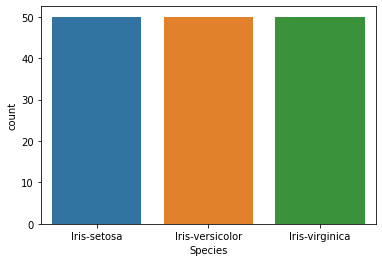

In [9]:
sns.countplot(x='Species',data=df)

In [10]:
df_box=df.iloc[:,1:5]
df_box

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3.5,1.4,0.2,Iris-setosa
1,3.0,1.4,0.2,Iris-setosa
2,3.2,1.3,0.2,Iris-setosa
3,3.1,1.5,0.2,Iris-setosa
4,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...
145,3.0,5.2,2.3,Iris-virginica
146,2.5,5.0,1.9,Iris-virginica
147,3.0,5.2,2.0,Iris-virginica
148,3.4,5.4,2.3,Iris-virginica


<AxesSubplot:>

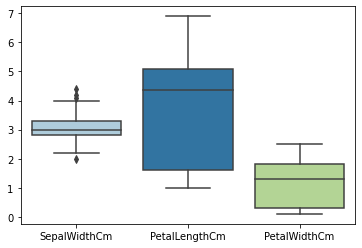

In [11]:
# Create the boxplot
sns.boxplot(data=df_box,palette="Paired")

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

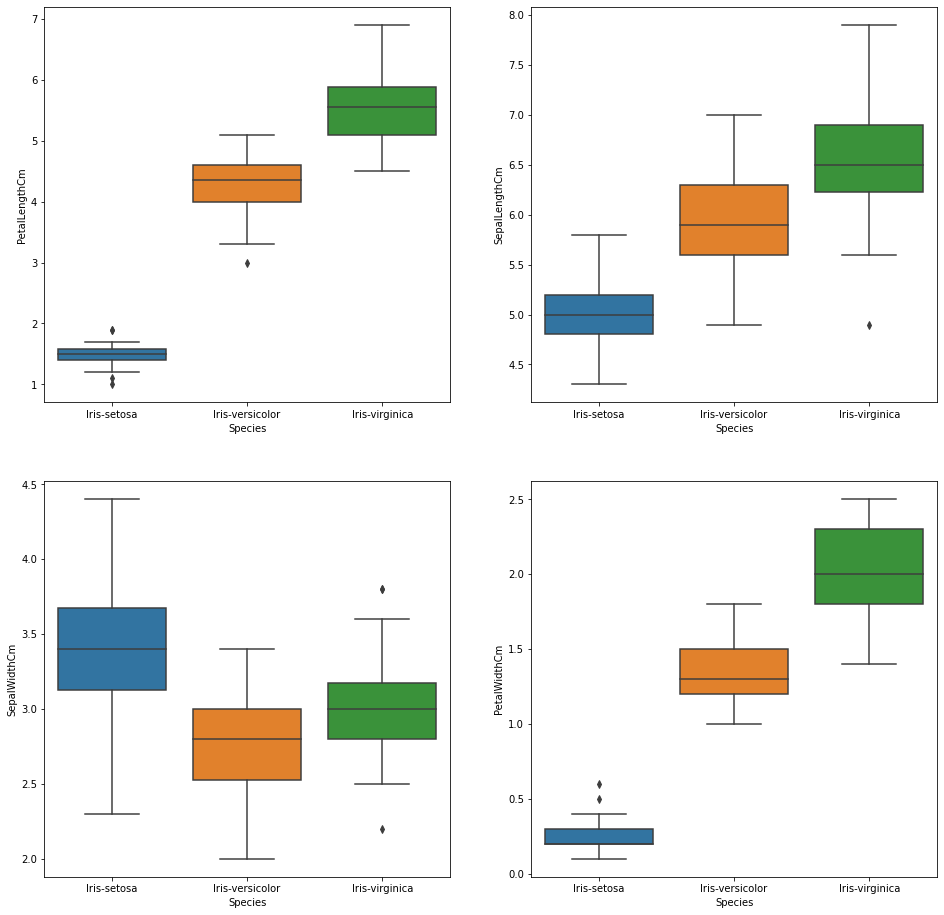

In [12]:
fig, ax = plt.subplots(2,2, figsize=(16,16))
sns.boxplot(x='Species',y='PetalLengthCm',data=df,ax=ax[0,0])
sns.boxplot(x='Species',y='SepalLengthCm',data=df,ax=ax[0,1])
sns.boxplot(x='Species',y='SepalWidthCm',data=df,ax=ax[1,0])
sns.boxplot(x='Species',y='PetalWidthCm',data=df,ax=ax[1,1])

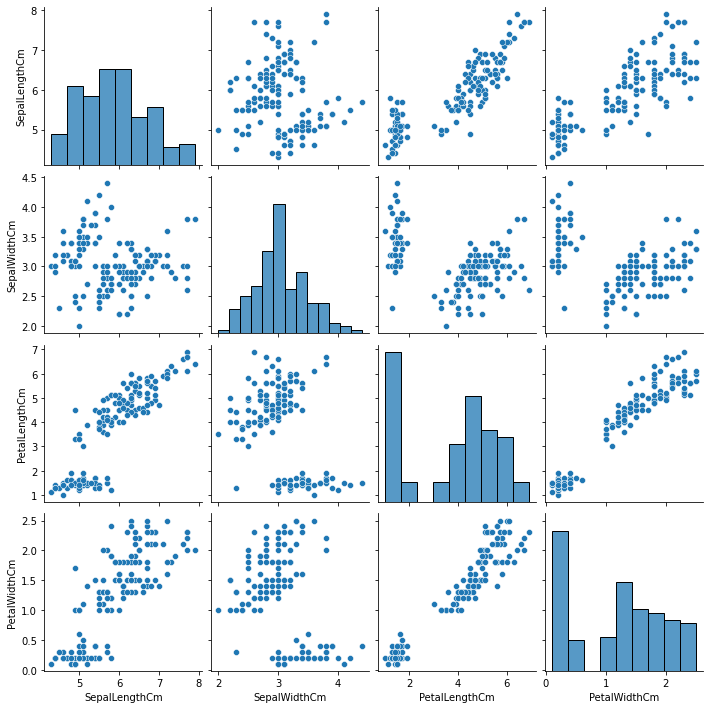

In [13]:
sns.pairplot(df)

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Species'] = labelencoder.fit_transform(df['Species'])
print("##########After Label Encoding###########")
print(df)

##########After Label Encoding###########
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
3              4.6           3.1            1.5           0.2        0
4              5.0           3.6            1.4           0.2        0
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2

[150 rows x 5 columns]


<AxesSubplot:>

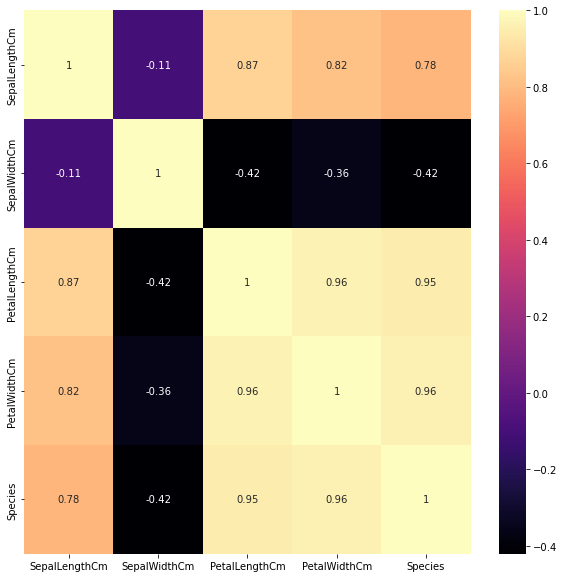

In [15]:
correlation=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap = "magma")

In [16]:
# Selecting features - [SepalLengthCm,PetalLengthCm,PetalWidthCm ]
X = df.iloc[:, [0,2,3]].values
Y = df.iloc[:, 4].values

In [17]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = df['Species'] )

## Feature scaling

In [18]:
# Using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

# Data Modelling

## **Applying KNN algorithm**

In [19]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [20]:
# Making predictions on test dataset
Y_pred_knn = knn.predict(X_test)

In [21]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)


In [22]:
# Accuracy on test set
print("K Nearest neighbors: " + str(accuracy_knn * 100))

K Nearest neighbors: 93.33333333333333


### creating a list to store the accuracy of different machine learning algorithm on this dataset

In [23]:
m_accuracy=[] #creating a list to store the accuracy of different machine learning algorithm on this dataset
m_accuracy.append(accuracy_knn*100)

In [24]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:",confusion_matrix(Y_test, Y_pred_knn))

Confusion Matrix: [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


<AxesSubplot:>

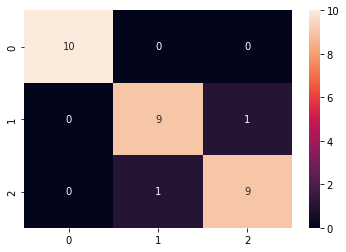

In [25]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(Y_test, Y_pred_knn)), annot=True)


## **Applying SVM algorithm**

#### RBF SVM Classification:

In [26]:
from sklearn.svm import SVC

#### RBF SVM Classification:
classifier = SVC(kernel = 'rbf', random_state = 0)


classifier.fit(X_train, Y_train)
Y_pred_rbf_svm=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_rbf_svm=accuracy_score(Y_test, Y_pred_rbf_svm)*100
print("Accuracy: ",accuracy_rbf_svm)

Accuracy:  93.33333333333333


Confusion Matrix: [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


<AxesSubplot:>

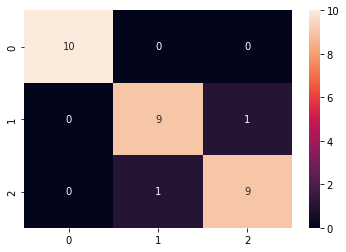

In [27]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:",confusion_matrix(Y_test, Y_pred_rbf_svm))# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(Y_test, Y_pred_rbf_svm)), annot=True)

#### Linear SVM Classification:

In [28]:
from sklearn.svm import SVC

#### Linear SVM Classification:
classifier= SVC(kernel = 'linear', random_state = 0)

classifier.fit(X_train, Y_train)
Y_pred_lin_svm=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_linear_svm=accuracy_score(Y_test, Y_pred_lin_svm)*100
print("Accuracy: ",accuracy_linear_svm)

Accuracy:  93.33333333333333


In [29]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:",confusion_matrix(Y_test, Y_pred_lin_svm))

Confusion Matrix: [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


<AxesSubplot:>

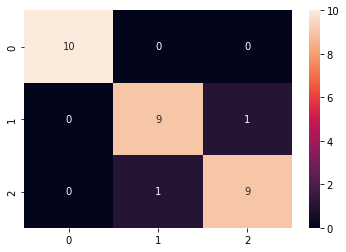

In [30]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(Y_test, Y_pred_lin_svm)), annot=True)

#### Polynomial SVM Classification:

In [31]:
from sklearn.svm import SVC

#### Polynomial SVM Classification:
classifier = SVC(kernel = 'poly', random_state = 0)


classifier.fit(X_train, Y_train)
Y_pred_poly_svm=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_poly_svm=accuracy_score(Y_test, Y_pred_poly_svm)*100
print("Accuracy: ",accuracy_poly_svm)

Accuracy:  96.66666666666667


In [32]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:",confusion_matrix(Y_test, Y_pred_poly_svm))

Confusion Matrix: [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


<AxesSubplot:>

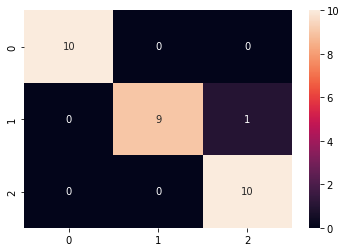

In [33]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(Y_test, Y_pred_poly_svm)), annot=True)

#### Sigmoid SVM Classification:

In [34]:
from sklearn.svm import SVC

#### Sigmoid SVM Classification:
classifier = SVC(kernel = 'sigmoid', random_state = 0)

classifier.fit(X_train, Y_train)
Y_pred_sigm_svm=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_sigmoid_svm= accuracy_score(Y_test, Y_pred_sigm_svm)*100
print("Accuracy: ",accuracy_sigmoid_svm)

Accuracy:  10.0


In [35]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:",confusion_matrix(Y_test, Y_pred_sigm_svm))

Confusion Matrix: [[ 3  0  7]
 [ 6  0  4]
 [10  0  0]]


<AxesSubplot:>

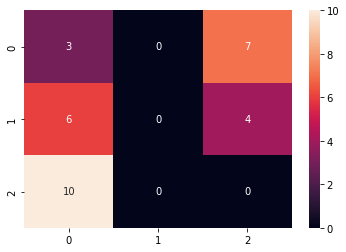

In [36]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(Y_test, Y_pred_sigm_svm)), annot=True)

### After applying SVM algorithm, for differenet kernels, we find highest accuracy of SVM using polynomial function.

In [37]:
m_accuracy.append(accuracy_poly_svm)

**Applying Naive Bayes**

In [38]:
from sklearn.naive_bayes import GaussianNB
nbayes_classifier = GaussianNB()
nbayes_classifier.fit(X_train, Y_train)
y_pred_nav_bayes=nbayes_classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_naive_bayes=accuracy_score(Y_test,y_pred_nav_bayes)*100
print("Accuracy  :",accuracy_naive_bayes)


Accuracy  : 96.66666666666667


In [39]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:",confusion_matrix(Y_test,y_pred_nav_bayes))

Confusion Matrix: [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


<AxesSubplot:>

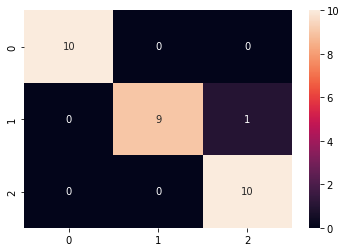

In [40]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(Y_test,y_pred_nav_bayes)), annot=True)

In [41]:
m_accuracy.append(accuracy_naive_bayes)

**Applying Random Forest**

In [42]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, 
                criterion = 'gini', random_state =21)


classifier.fit(X_train, Y_train)
y_pred_rf_gini=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_gini_random_forest=accuracy_score(Y_test,y_pred_rf_gini)*100
print("Accuracy   :",accuracy_gini_random_forest)

from sklearn.metrics import confusion_matrix
print("Confusion Matrix:",confusion_matrix(Y_test,y_pred_rf_gini))

Accuracy   : 90.0
Confusion Matrix: [[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]


<AxesSubplot:>

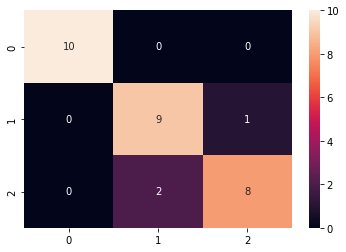

In [43]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(Y_test,y_pred_rf_gini)), annot=True)

In [44]:
m_accuracy.append(accuracy_gini_random_forest)

**Comapiring all the accuracies**

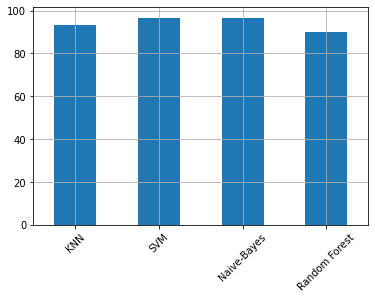

In [45]:
import matplotlib.pyplot as plt
s=pd.Series(m_accuracy,index=['KNN','SVM','Naive-Bayes','Random Forest'])
s.plot.bar()
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [46]:
print ("Accuracy using KNN algorithm is: ", m_accuracy[0])
print ("Accuracy using SVM algorithm is: ", m_accuracy[1])
print ("Accuracy using Naive-Bayes algorithm is: ", m_accuracy[2])
print ("Accuracy using Random Forest algorithm is: ", m_accuracy[3])

Accuracy using KNN algorithm is:  93.33333333333333
Accuracy using SVM algorithm is:  96.66666666666667
Accuracy using Naive-Bayes algorithm is:  96.66666666666667
Accuracy using Random Forest algorithm is:  90.0


# Conclusion :
## **After applying different machine learning algorithms, we found that both Polynomial SVM Classification and Naive Bayes are best fit for our dataset as both of them are giving an accuracy of 96.66%.**

# Making a Prediction

In [47]:
input_data = (6.3,2.7,4.9,1.8)

new_input_data=[]          #Making a new data with only the necessary columns
index_taken=[0,2,3]
for i in index_taken:
    new_input_data.append(input_data[i])
  

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(new_input_data)

# reshaping the array as we have only single sample as input
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) 

# standardize the input data
std_data = sc.transform(input_data_reshaped)

prediction =nbayes_classifier.predict(std_data)

if (prediction[0] == 0):
  print('The species is Iris-setosa')
elif (prediction[0] == 1):
    print('The species is Iris-versicolor')
else:
  print('The species is Iris-virginica')


The species is Iris-virginica
